In [1]:
## Import packages

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Load data

df = pd.read_csv('../../raw_data/beema/cleaned_data/top_200_song_consumption_cleaned.csv')

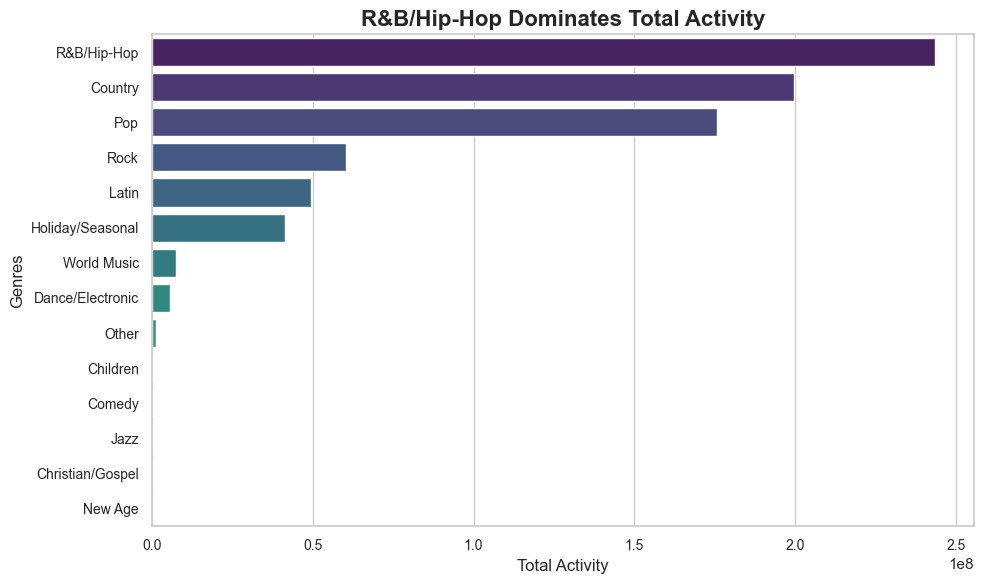

In [3]:
## Bar graph for Genres vs. Total Activity

activity_by_genre = df.groupby('Genre')['TW Total Activity'].sum().sort_values(ascending=False)

# Convert Series to DataFrame for Seaborn
activity_df = activity_by_genre.reset_index()
activity_df.columns = ['Genre', 'Total Activity']

# Seaborn barplot template
def create_bar_chart(data, x_column, y_column, title, x_label, y_label):
    sns.set(style="whitegrid")  # Set the style for the plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    
    # Create the barplot
    sns.barplot(data=data, x=x_column, y=y_column, hue=y_column, palette="viridis")
    
    # Add customizations
    plt.title(title, fontsize=16, weight='bold')  # Set the title
    plt.xlabel(x_label, fontsize=12)  # Set x-axis label
    plt.ylabel(y_label, fontsize=12)  # Set y-axis label
    plt.xticks(fontsize=10)  # Adjust x-axis ticks
    plt.yticks(fontsize=10)  # Adjust y-axis ticks
    plt.tight_layout()  # Adjust layout to fit nicely
    
    # Show the plot
    plt.show()

# Use the template
create_bar_chart(
    data=activity_df,
    x_column='Total Activity',
    y_column='Genre',
    title='R&B/Hip-Hop Dominates Total Activity',
    x_label='Total Activity',
    y_label='Genres'
)

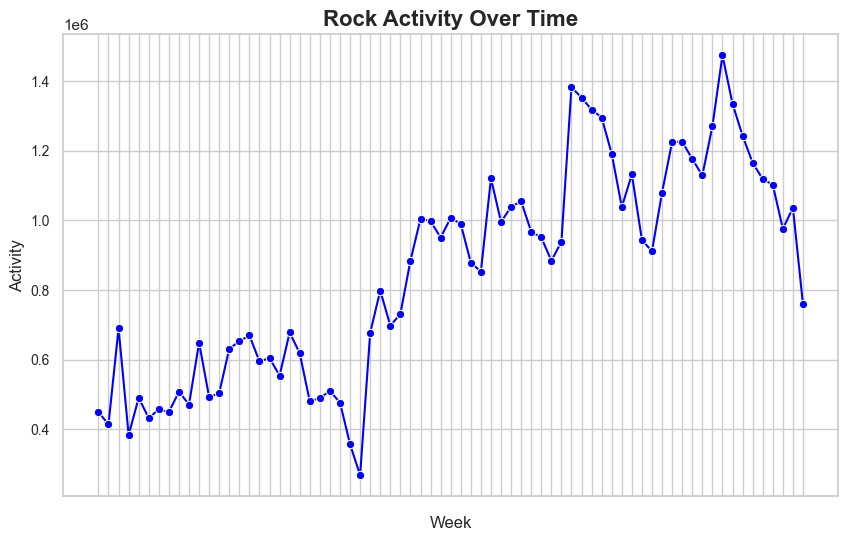

In [22]:
## Line graph for Rock Activity over Time

rock_over_time = df[df['Genre'] == 'Rock'].groupby('week_of')['TW Total Activity'].sum()

# Convert Series to DataFrame for Seaborn
rock_over_time_df = rock_over_time.reset_index()
rock_over_time_df.columns = ['Week', 'Total Activity']

# Seaborn line plot template
def create_line_graph(data, x_column, y_column, title, x_label, y_label):
    sns.set(style="whitegrid")  # Set the style for the plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    
    # Create the line plot
    sns.lineplot(data=data, x=x_column, y=y_column, marker='o', color='blue')
    
    # Add customizations
    plt.title(title, fontsize=16, weight='bold')  # Set the title
    plt.xlabel(x_label, fontsize=12)  # Set x-axis label
    plt.ylabel(y_label, fontsize=12)  # Set y-axis label
    plt.xticks(fontsize=0, color='white')  # Adjust x-axis ticks
    plt.yticks(fontsize=10)  # Adjust y-axis ticks

    
    # Show the plot
    plt.show()

# Use the template
create_line_graph(
    data=rock_over_time_df,
    x_column='Week',
    y_column='Total Activity',
    title='Rock Activity Over Time',
    x_label = 'Week',
    y_label='Activity'
)

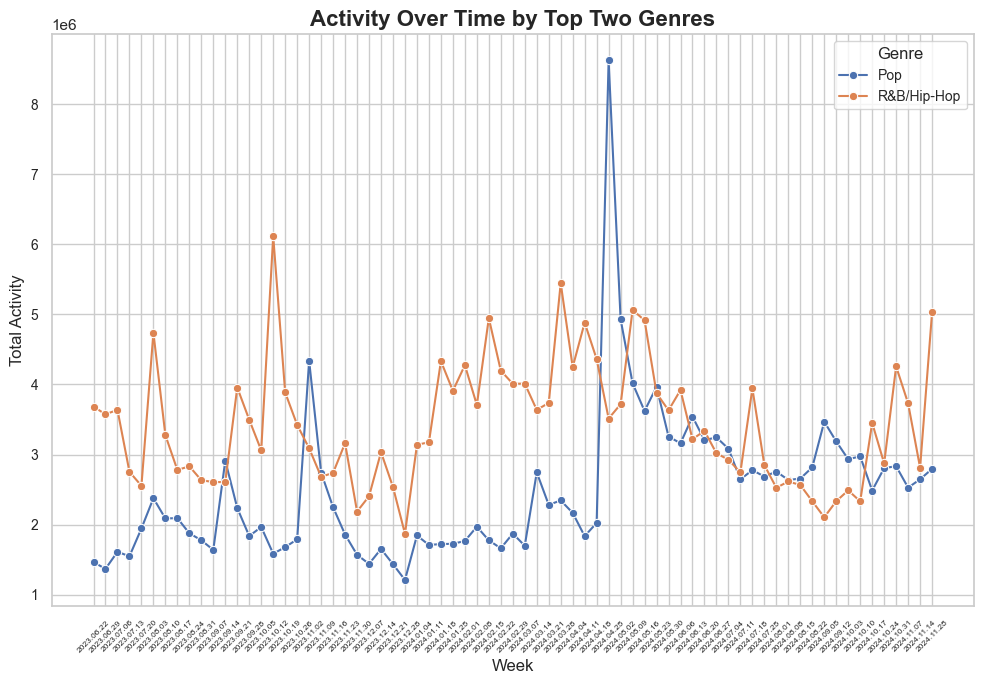

In [38]:
# Group data by week_of and Genre
activity_over_time = df[df['Genre'].isin(['Pop', 'R&B/Hip-Hop'])].groupby(['week_of', 'Genre'])['TW Total Activity'].sum().reset_index()

# Seaborn line plot template for multiple genres
def create_multi_genre_line_graph(data, x_column, y_column, hue_column, title, x_label, y_label):
    sns.set(style="whitegrid")  # Set the style for the plot
    plt.figure(figsize=(10, 7))  # Set the figure size
    
    # Create the line plot with hue for multiple lines
    sns.lineplot(data=data, x=x_column, y=y_column, hue=hue_column, marker='o')
    
    # Add customizations
    plt.title(title, fontsize=16, weight='bold')  # Set the title
    plt.xlabel(x_label, fontsize=12)  # Set x-axis label
    plt.ylabel(y_label, fontsize=12)  # Set y-axis label
    plt.xticks(fontsize=6, rotation=45)  # Rotate x-axis ticks for better readability
    plt.yticks(fontsize=10)  # Adjust y-axis ticks
    plt.legend(title=hue_column, fontsize=10)  # Add legend
    plt.tight_layout()  # Adjust layout to fit nicely
    
    # Show the plot
    plt.show()

# Use the template
create_multi_genre_line_graph(
    data=activity_over_time,
    x_column='week_of',
    y_column='TW Total Activity',
    hue_column='Genre',
    title='Activity Over Time by Top Two Genres',
    x_label='Week',
    y_label='Total Activity'
)

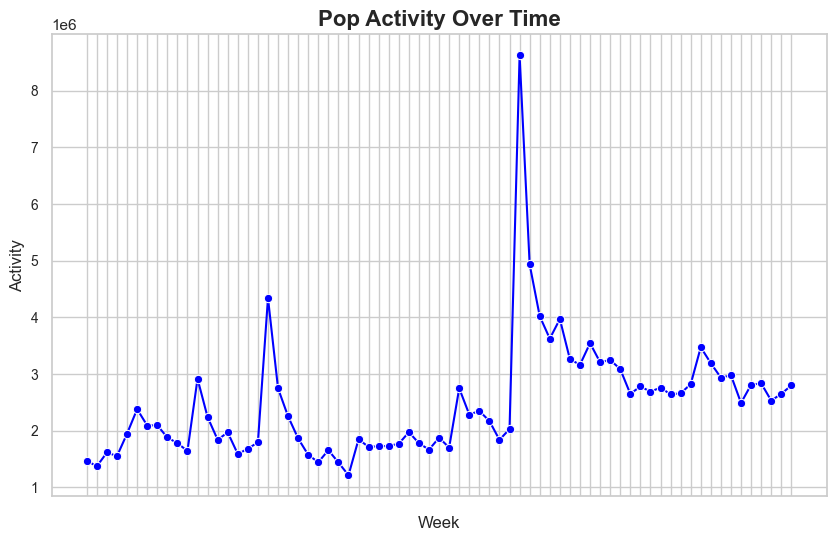

In [29]:
## Line graph for Rock Activity over Time

pop_over_time = df[df['Genre'] == 'Pop'].groupby('week_of')['TW Total Activity'].sum()

# Convert Series to DataFrame for Seaborn
pop_over_time_df = pop_over_time.reset_index()
pop_over_time_df.columns = ['Week', 'Total Activity']

# Use the template
create_line_graph(
    data=pop_over_time_df,
    x_column='Week',
    y_column='Total Activity',
    title='Pop Activity Over Time',
    x_label = 'Week',
    y_label='Activity'
)